# Additional Analysis

This notebook contains the analysis between all variables in the dataset, except earnings. That way we can include all 1000 observations from the original Kaggle dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
data = pd.read_csv('data/twitch-data-all.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   channel              1000 non-null   object 
 1   watch_time_minutes   1000 non-null   int64  
 2   stream_time_minutes  1000 non-null   int64  
 3   peak_viewers         1000 non-null   int64  
 4   average_viewers      1000 non-null   int64  
 5   followers            1000 non-null   int64  
 6   followers_gained     1000 non-null   int64  
 7   views_gained         1000 non-null   int64  
 8   partnered            1000 non-null   bool   
 9   mature               1000 non-null   bool   
 10  language             1000 non-null   object 
 11  ranking              788 non-null    float64
 12  earnings_usd         788 non-null    float64
dtypes: bool(2), float64(2), int64(7), object(2)
memory usage: 88.0+ KB


In [5]:
# Save original setting
original_format = pd.get_option('display.float_format')

# temporary format
pd.set_option('display.float_format', '{:.0f}'.format)
data.describe()

,watch_time_minutes,stream_time_minutes,peak_viewers,average_viewers,followers,followers_gained,views_gained,ranking,earnings_usd
count,1000,1000,1000,1000,1000,1000,1000,788,788
mean,418427930,120515,37065,4781,570054,205519,11668166,1344,460808
std,549635514,85376,60314,8454,804413,339914,24905722,1785,718980
min,122192850,3465,496,235,3660,-15772,175788,1,23574
25%,163189894,73759,9114,1458,170546,43758,3880602,241,122655
50%,234990788,108240,16676,2425,318063,98352,6456324,646,263527
75%,433739918,141844,37570,4786,624332,236131,12196762,1644,534276
max,6196161750,521445,639375,147643,8938903,3966525,670137548,9977,9626712


In [6]:
# Reset to the original format
pd.set_option('display.float_format', original_format)

## Correlations of continuous variables

In [7]:
continuous_data = data.select_dtypes(include=['number'])
continuous_data = continuous_data.drop(["ranking", "earnings_usd"], axis=1)
correlation = continuous_data.corr(method='spearman')
round(correlation, 3)

,watch_time_minutes,stream_time_minutes,peak_viewers,average_viewers,followers,followers_gained,views_gained
watch_time_minutes,1.000,0.175,0.537,0.649,0.514,0.392,0.733
stream_time_minutes,0.175,1.000,-0.370,-0.535,-0.247,-0.324,0.032
peak_viewers,0.537,-0.370,1.000,0.728,0.577,0.585,0.539
average_viewers,0.649,-0.535,0.728,1.000,0.628,0.558,0.579
followers,0.514,-0.247,0.577,0.628,1.000,0.671,0.476
followers_gained,0.392,-0.324,0.585,0.558,0.671,1.000,0.367
views_gained,0.733,0.032,0.539,0.579,0.476,0.367,1.000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0, 0.5, 'watch_time_minutes'),
  Text(0, 1.5, 'stream_time_minutes'),
  Text(0, 2.5, 'peak_viewers'),
  Text(0, 3.5, 'average_viewers'),
  Text(0, 4.5, 'followers'),
  Text(0, 5.5, 'followers_gained'),
  Text(0, 6.5, 'views_gained')])

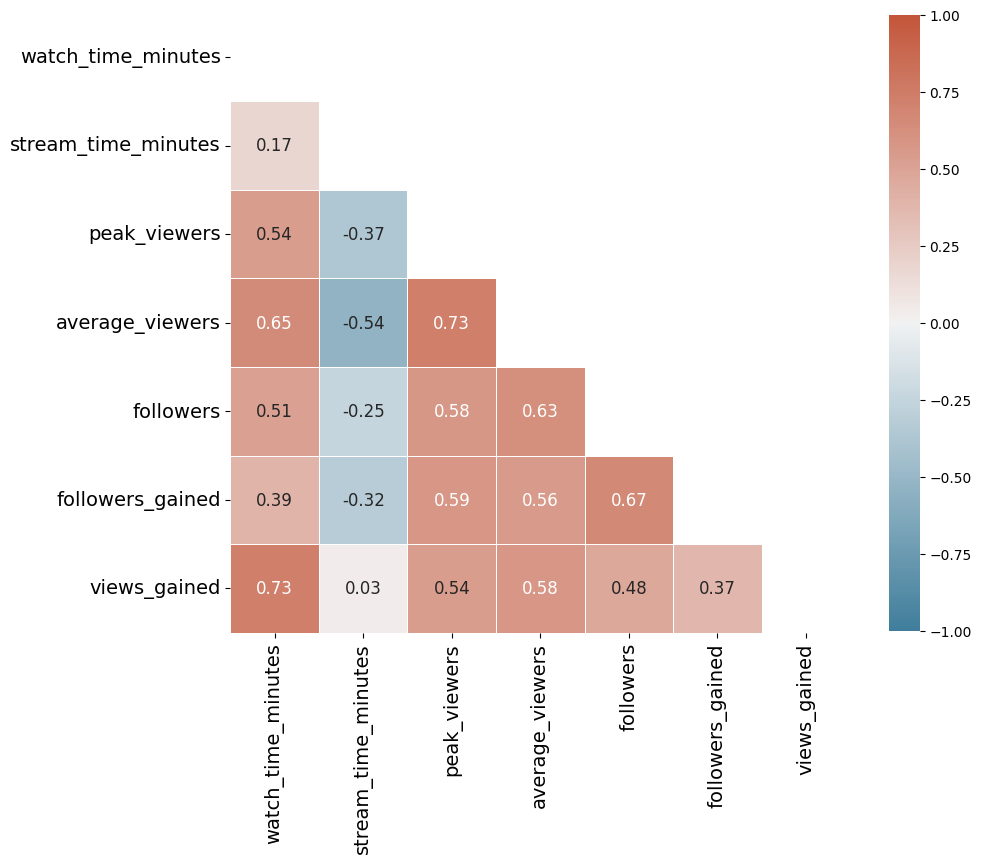

In [8]:
plt.figure(figsize=(10, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(
    correlation, 
    mask=mask,
    cmap=cmap,
    vmax=1.0,
    vmin=-1.0,
    center=0,
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .8},
    annot=True,
    fmt=".2f",
    annot_kws={"size": 12}
)


plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## Correlations with average viewers

In [9]:
metrics = [
    'watch_time_minutes', 
    'stream_time_minutes', 
    'peak_viewers', 
    'views_gained',
    'followers_gained', 
    'followers'
]
corr_av = correlation['average_viewers']
corr_av = corr_av[metrics].sort_values(ascending=False)
corr_av.index = [x.replace('_', ' ').title() for x in corr_av.index]
corr_av

Peak Viewers           0.728015
Watch Time Minutes     0.649473
Followers              0.627701
Views Gained           0.579129
Followers Gained       0.557659
Stream Time Minutes   -0.535159
Name: average_viewers, dtype: float64

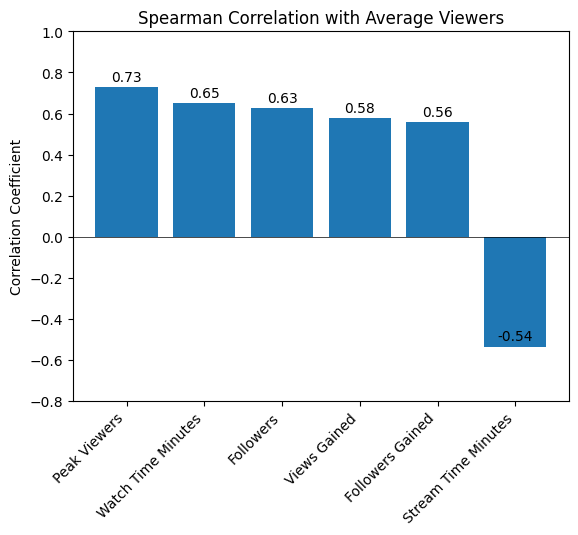

In [10]:
plt.bar(corr_av.index, corr_av.values)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.ylabel('Correlation Coefficient')
plt.title('Spearman Correlation with Average Viewers')
plt.ylim(-0.8, 1)

for i, v in enumerate([x for x in corr_av]):
    plt.text(i, v + 0.03, f'{v:.2f}', ha='center')

**Initial thoughts**
* Potential feedback loop: Channels with high average viewers have higher watch time, more followers, and grow more quickly (views gained and followers gained)
* Surprisingly stream time has a strong negative correlation with avereage viewers

Text(0.5, 1.0, 'Average Viewers vs. Watch Time')

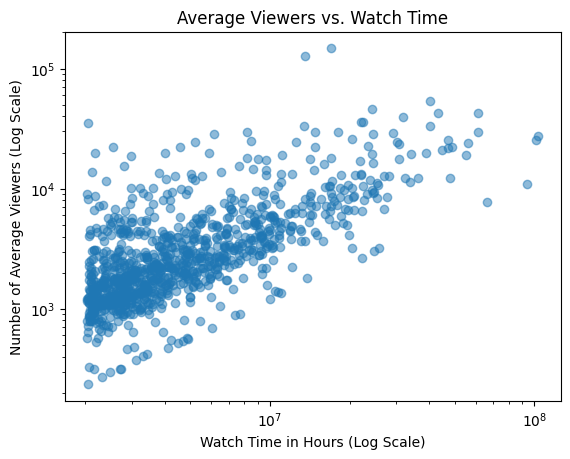

In [11]:
plt.scatter(data['watch_time_minutes']/60, data['average_viewers'], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Watch Time in Hours (Log Scale)')
plt.ylabel('Number of Average Viewers (Log Scale)')
plt.title('Average Viewers vs. Watch Time')

Text(0.5, 1.0, 'Average Viewers vs. Stream Time')

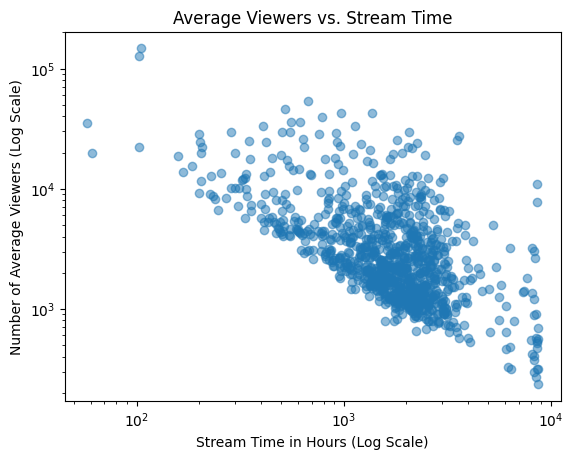

In [12]:
plt.scatter(data['stream_time_minutes']/60, data['average_viewers'], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Stream Time in Hours (Log Scale)')
plt.ylabel('Number of Average Viewers (Log Scale)')
plt.title('Average Viewers vs. Stream Time')

## Correlations with followers gained

In [13]:
metrics = [
    'watch_time_minutes', 
    'stream_time_minutes', 
    'peak_viewers', 
    'views_gained',
    'average_viewers', 
    'followers'
]
corr_fg = correlation['followers_gained']
corr_fg = corr_fg[metrics].sort_values(ascending=False)
corr_fg.index = [x.replace('_', ' ').title() for x in corr_fg.index]
corr_fg

Followers              0.671375
Peak Viewers           0.585060
Average Viewers        0.557659
Watch Time Minutes     0.391522
Views Gained           0.367200
Stream Time Minutes   -0.323663
Name: followers_gained, dtype: float64

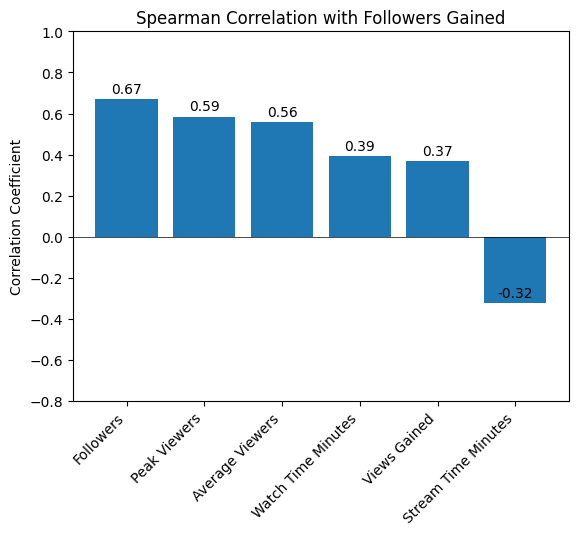

In [14]:
plt.bar(corr_fg.index, corr_fg.values)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.ylabel('Correlation Coefficient')
plt.title('Spearman Correlation with Followers Gained')
plt.ylim(-0.8, 1)

for i, v in enumerate([x for x in corr_fg]):
    plt.text(i, v + 0.03, f'{v:.2f}', ha='center')

## Exploring channel follower growth

In [15]:
# Calculate growth efficiency metrics
data['followers_per_hour'] = data['followers_gained'] / (data['stream_time_minutes'] / 60)
data['views_per_hour'] = data['views_gained'] / (data['stream_time_minutes'] / 60)
# Calculate a rough percentile rank for coloring
data['efficiency_rank'] = data['followers_per_hour'].rank(pct=True)

Text(0, 0.5, 'Channel')

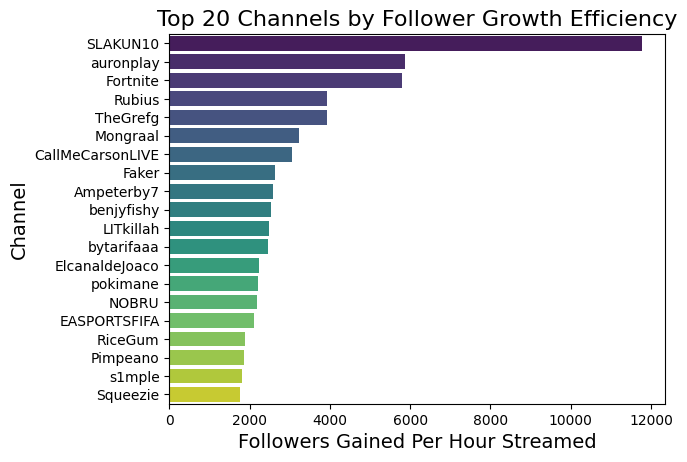

In [16]:
data_efficient = data.sort_values('followers_per_hour', ascending=False).head(20)

ax = sns.barplot(x='followers_per_hour', y='channel', hue='channel', 
                 palette='viridis', legend=False, data=data_efficient)

plt.title('Top 20 Channels by Follower Growth Efficiency', fontsize=16)
plt.xlabel('Followers Gained Per Hour Streamed', fontsize=14)
plt.ylabel('Channel', fontsize=14)

# for i, v in enumerate(data_efficient['followers_per_hour']):
#     ax.text(v + 50, i, f"{v:.0f}", va='center')

# plt.grid(axis='x', linestyle='--', alpha=0.7)

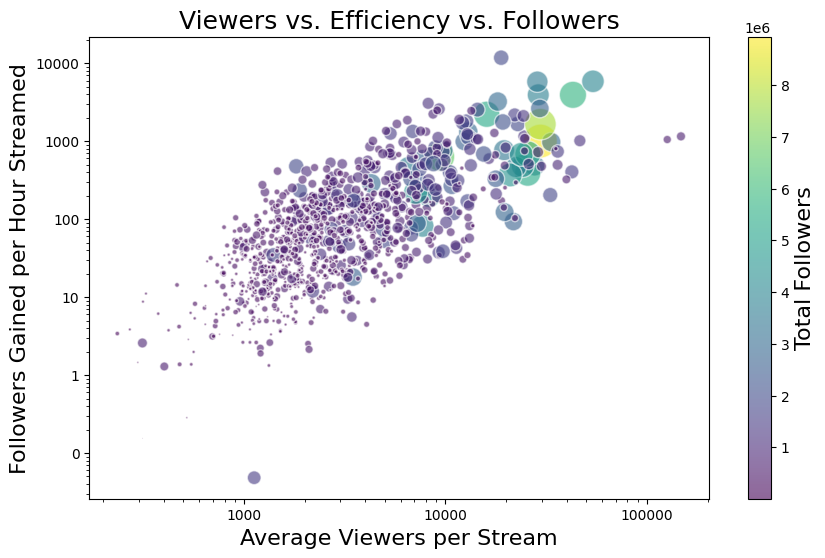

In [17]:
plt.figure(figsize=(10, 6))
# Create a scatter plot with size based on total followers
scatter = plt.scatter(
    data['average_viewers'], 
    data['followers_per_hour'],
    alpha=0.6,
    c=data['followers'],  # Color based on follower count
    cmap='viridis',
    s=data['followers'].apply(lambda x: x/15000),  # Size based on followers
    # s=data['followers'].apply(lambda x: min(x/50000, 300)),  # Size based on followers
    edgecolors='w'
    )

# Add a colorbar
# Bubble size represents channel's follower count. 
cbar = plt.colorbar(scatter)
cbar.set_label('Total Followers', fontsize=16)

plt.title('Viewers vs. Efficiency vs. Followers', fontsize=18)
plt.xlabel('Average Viewers per Stream', fontsize=16)
plt.ylabel('Followers Gained per Hour Streamed', fontsize=16)
plt.xscale('log')
plt.yscale('log')


# Format x and y axis to avoid scientific notation
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

# cbar.formatter = ticker.ScalarFormatter(useOffset=False)
# cbar.formatter.set_scientific(False)
# cbar.update_ticks()

* Channels with more average viewers gain more followers and have more total followers
* Positive feedback loop where popular channels become more popular more quickly?

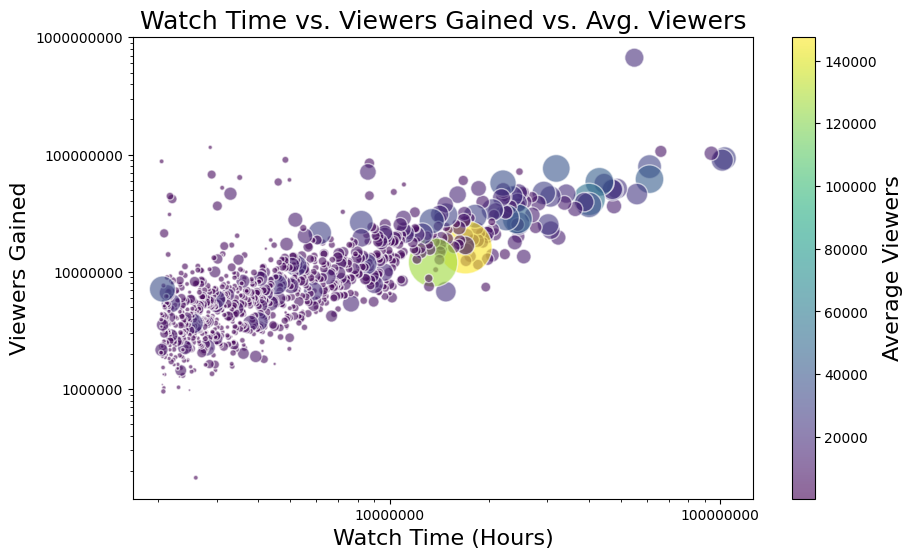

In [18]:
plt.figure(figsize=(10, 6))
# Create a scatter plot with size based on total followers
scatter = plt.scatter(
    data['watch_time_minutes']/60, # convert to hours
    data['views_gained'],
    alpha=0.6,
    c=data['average_viewers'],  # Color based on follower count
    cmap='viridis',
    s=data['average_viewers'].apply(lambda x: x/100),  # Size based on avg viewers
    edgecolors='w'
    )

# Add a colorbar
# Bubble size represents channel's follower count. 
cbar = plt.colorbar(scatter)
cbar.set_label('Average Viewers', fontsize=16)

plt.title('Watch Time vs. Viewers Gained vs. Avg. Viewers', fontsize=18)
plt.xlabel('Watch Time (Hours)', fontsize=16)
plt.ylabel('Viewers Gained', fontsize=16)
plt.xscale('log')
plt.yscale('log')


# Format x and y axis to avoid scientific notation
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

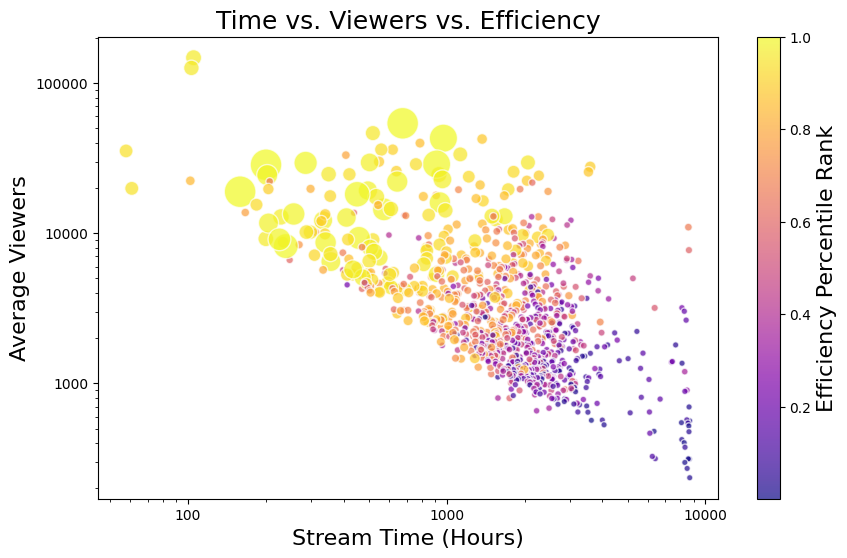

In [19]:
plt.figure(figsize=(10, 6))

# Create the scatter plot
scatter = plt.scatter(data['stream_time_minutes']/60, 
                     data['average_viewers'],
                     alpha=0.7,
                     c=data['efficiency_rank'],
                     cmap='plasma',
                     s=data['followers_per_hour'].apply(lambda x: min(x/10, 500) + 20),
                     edgecolors='w')

# Add a colorbar
# Bubble size represents follower growth efficiency (followers gained per hour). Color indicates efficiency percentile.
cbar = plt.colorbar(scatter)
cbar.set_label('Efficiency Percentile Rank', fontsize=16)

plt.title('Time vs. Viewers vs. Efficiency', fontsize=18)
plt.xlabel('Stream Time (Hours)', fontsize=16)
plt.ylabel('Average Viewers', fontsize=16)
plt.yscale('log')
plt.xscale('log')

# Format x and y axis to avoid scientific notation
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

* Quality over quantity in terms of content?
* Better to be engaging rather than streaming for long periods

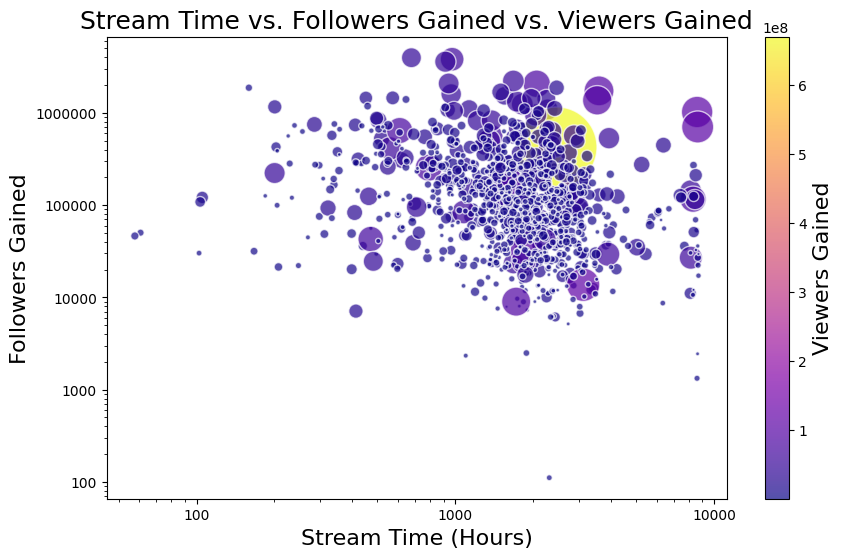

In [20]:
plt.figure(figsize=(10, 6))

# Create the scatter plot
scatter = plt.scatter(data['stream_time_minutes']/60, 
                     data['followers_gained'],
                     alpha=0.7,
                     c=data['views_gained'],
                     cmap='plasma',
                     s=data['views_gained'].apply(lambda x:x/200000),
                     edgecolors='w')

# Add a colorbar
# Bubble size represents follower growth efficiency (followers gained per hour). Color indicates efficiency percentile.
cbar = plt.colorbar(scatter)
cbar.set_label('Viewers Gained', fontsize=16)

plt.title('Stream Time vs. Followers Gained vs. Viewers Gained', fontsize=18)
plt.xlabel('Stream Time (Hours)', fontsize=16)
plt.ylabel('Followers Gained', fontsize=16)
plt.yscale('log')
plt.xscale('log')

# Format x and y axis to avoid scientific notation
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

/Users/avrincon/Sync/Courses/NYC-data-science/Projects/top-twitch-streamers/.venv/lib/python3.12/site-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


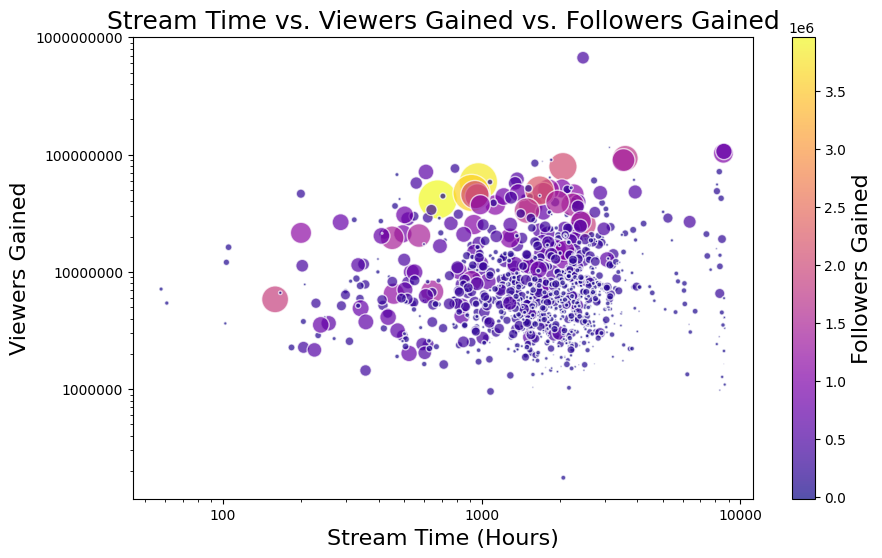

In [21]:
plt.figure(figsize=(10, 6))

# Create the scatter plot
scatter = plt.scatter(data['stream_time_minutes']/60, 
                     data['views_gained'],
                     alpha=0.7,
                     c=data['followers_gained'],
                     cmap='plasma',
                     s=data['followers_gained'].apply(lambda x:x/5000),
                     edgecolors='w')

# Add a colorbar
# Bubble size represents follower growth efficiency (followers gained per hour). Color indicates efficiency percentile.
cbar = plt.colorbar(scatter)
cbar.set_label('Followers Gained', fontsize=16)

plt.title('Stream Time vs. Viewers Gained vs. Followers Gained', fontsize=18)
plt.xlabel('Stream Time (Hours)', fontsize=16)
plt.ylabel('Viewers Gained', fontsize=16)
plt.yscale('log')
plt.xscale('log')

# Format x and y axis to avoid scientific notation
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)

plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

## Average Viewers by Language

In [40]:
language_stats = data.groupby('language').agg({
    'channel': 'count',
    'average_viewers': 'mean',
    'views_gained': 'mean',
    'followers': 'mean',
    'followers_gained': 'mean',
    'watch_time_minutes': 'mean'
}).rename(columns={'channel': 'streamer_count'}).sort_values('streamer_count', ascending=False)
language_stats['watch_time_hours'] = language_stats['watch_time_minutes'] / 60
language_stats['watchtime_per_viewer'] = language_stats['watch_time_hours'] / language_stats['average_viewers']


# subset top 10 languages by streamer count
top_languages = language_stats.head(10).copy()

In [39]:
round(language_stats, 0)

,streamer_count,average_viewers,views_gained,followers,followers_gained,watch_time_minutes,watch_time_hours,watchtime_per_viewer
language,,,,,,,,
English,485,5113.0,12537009.0,705686.0,203294.0,471919599.0,7865327.0,1538.0
Korean,77,3914.0,9476194.0,262174.0,86643.0,360966414.0,6016107.0,1537.0
Russian,74,6594.0,16502153.0,339730.0,136864.0,376224456.0,6270408.0,951.0
Spanish,68,6450.0,9815709.0,779686.0,570378.0,376194784.0,6269913.0,972.0
French,66,3507.0,10179534.0,439735.0,181407.0,378074415.0,6301240.0,1797.0
Portuguese,61,3801.0,10868687.0,555868.0,247166.0,452488296.0,7541472.0,1984.0
German,49,4278.0,8387379.0,479368.0,172197.0,393960974.0,6566016.0,1535.0
Chinese,30,3425.0,10628286.0,201715.0,28210.0,338955981.0,5649266.0,1650.0
Turkish,22,4761.0,10866011.0,718936.0,259308.0,284710195.0,4745170.0,997.0


In [24]:
# define color mappings for top languages
language_colors = {
    'English': '#1f77b4',
    'Korean': '#ff7f0e',
    'Russian': '#2ca02c',
    'Spanish': '#d62728',
    'French': '#9467bd',
    'Portuguese': '#8c564b',
    'German': '#e377c2',
    'Chinese': '#7f7f7f',
    'Turkish': '#bcbd22',
    'Italian': '#17becf',
    'Polish': '#aec7e8',
    'Thai': '#ffbb78'
    }

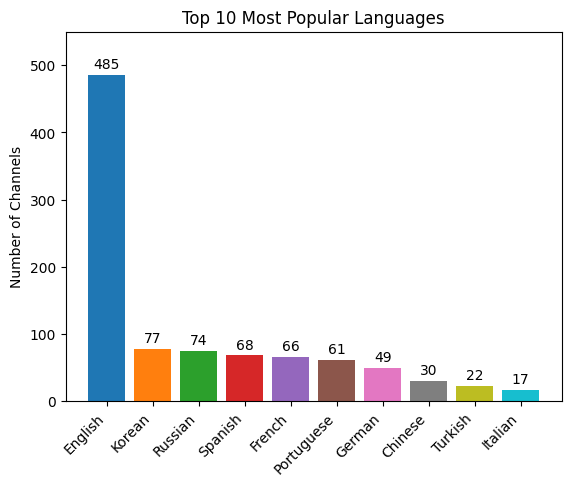

In [25]:
top_languages = top_languages.sort_values('streamer_count', ascending=False)
# Extract the colors in the same order as top_languages
colors = [language_colors.get(lang, '#333333') for lang in top_languages.index]

plt.bar(range(len(top_languages)), top_languages['streamer_count'], color=colors)
plt.xticks(range(len(top_languages)), top_languages.index, rotation=45, ha='right')
plt.title('Top 10 Most Popular Languages')
plt.ylabel('Number of Channels')
plt.ylim(0, 550)

for i, v in enumerate(top_languages['streamer_count']):
    plt.text(i, v + 10, f'{v:.0f}', ha='center')

* English is by far the most popular languages (by number of streamers)

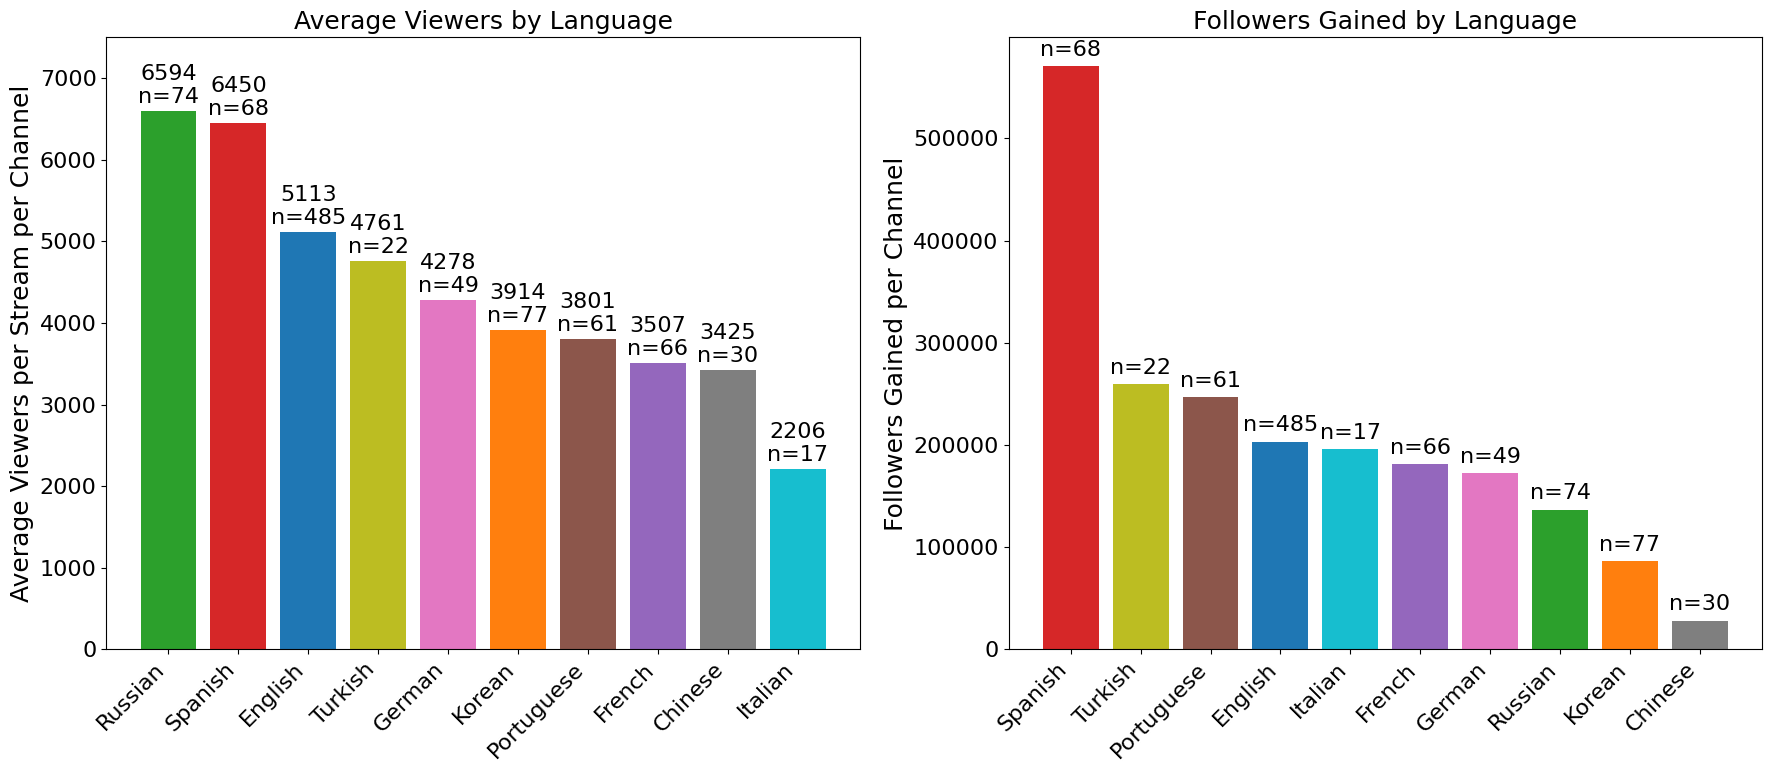

In [37]:
# Update font sizes globally
plt.rc('axes', titlesize=18)   
plt.rc('axes', labelsize=18)   
plt.rc('font', size=16)         
plt.rc('xtick', labelsize=16)   
plt.rc('ytick', labelsize=16)   
plt.rc('legend', fontsize=16)   


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Average Viewers
top_languages_viewers = top_languages.sort_values('average_viewers', ascending=False)
colors_viewers = [language_colors.get(lang, '#333333') for lang in top_languages_viewers.index]

ax1.bar(range(len(top_languages_viewers)), top_languages_viewers['average_viewers'], color=colors_viewers)
ax1.set_xticks(range(len(top_languages_viewers)))
ax1.set_xticklabels(top_languages_viewers.index, rotation=45, ha='right')
ax1.set_title('Average Viewers by Language')
ax1.set_ylabel('Average Viewers per Stream per Channel')
ax1.set_ylim(0, 7500)

for i, v in enumerate(top_languages_viewers['average_viewers']):
    ax1.text(i, v + 100, f'{v:.0f}\nn={top_languages_viewers["streamer_count"].iloc[i]}', ha='center')

#Followers Gained
top_languages_followers = top_languages.sort_values('followers_gained', ascending=False)
colors_followers = [language_colors.get(lang, '#333333') for lang in top_languages_followers.index]

ax2.bar(range(len(top_languages_followers)), top_languages_followers['followers_gained'], color=colors_followers)
ax2.set_xticks(range(len(top_languages_followers)))
ax2.set_xticklabels(top_languages_followers.index, rotation=45, ha='right')
ax2.set_title('Followers Gained by Language')
ax2.set_ylabel('Followers Gained per Channel')

for i, v in enumerate(top_languages_followers['followers_gained']):
    ax2.text(i, v + 10000, f'n={top_languages_followers["streamer_count"].iloc[i]}', ha='center')


plt.tight_layout()

* More viewers per streamers than English for Russian and Spanish. Could also be a result of fewer channel options for those languages?
* Better channel growth opportunities in Russian and Spanish?

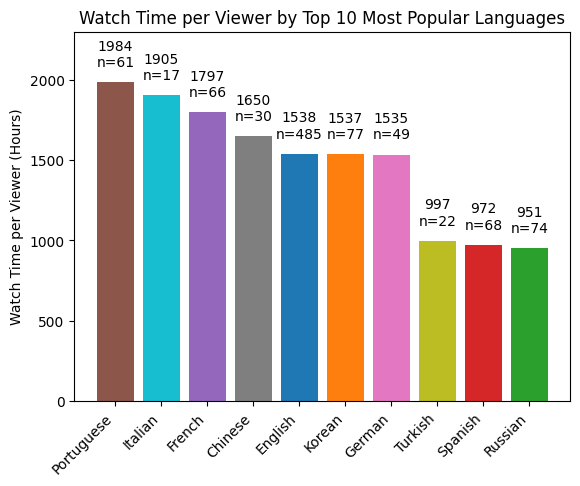

In [31]:
top_languages = top_languages.sort_values('watchtime_per_viewer', ascending=False)
# Extract the colors in the same order as top_languages
colors = [language_colors.get(lang, '#333333') for lang in top_languages.index]

plt.bar(range(len(top_languages)), top_languages['watchtime_per_viewer'], color=colors)
plt.xticks(range(len(top_languages)), top_languages.index, rotation=45, ha='right')
plt.title('Watch Time per Viewer by Top 10 Most Popular Languages')
plt.ylabel('Watch Time per Viewer (Hours)')
plt.ylim(0, 2300)

for i, v in enumerate(top_languages['watchtime_per_viewer']):
    plt.text(i, v + 100, f'{v:.0f}\nn={top_languages["streamer_count"].iloc[i]}', ha='center')

## Average viewers by category

In [22]:
data['mature_label'] = data['mature'].apply(lambda x: 'Mature' if x else 'Not Mature')
data['partnered_label'] = data['partnered'].apply(lambda x: 'Partnered' if x else 'Not Partnered')
data['combined_category'] = data.apply(
    lambda row: f"{'Partnered' if row['partnered'] else 'Not Partnered'} +\n {'Mature' if row['mature'] else 'Not Mature'}", 
    axis=1
)
# data.iloc[:, -3:]

partner_stats = data.groupby('partnered_label').agg({
    'channel': 'count',
    'average_viewers': 'mean',
    'views_gained': 'mean',
    'followers': 'mean',
    'followers_gained': 'mean',
    'watch_time_minutes': 'mean'
})
mature_stats = data.groupby('mature_label').agg({
    'channel': 'count',
    'average_viewers': 'mean',
    'views_gained': 'mean',
    'followers': 'mean',
    'followers_gained': 'mean',
    'watch_time_minutes': 'mean'
})
mature_stats.apply(round, axis=1)
category_stats = data.groupby('combined_category').agg({
    'channel': 'count',
    'average_viewers': 'mean',
    'views_gained': 'mean',
    'followers': 'mean',
    'followers_gained': 'mean',
    'watch_time_minutes': 'mean'
})

pm_stats = pd.concat([partner_stats, mature_stats], axis=0)
pm_stats

,channel,average_viewers,views_gained,followers,followers_gained,watch_time_minutes
Not Partnered,22,5287,17529223,331943,143304,278295633
Partnered,978,4770,11536322,575410,206918,421580190
Mature,230,3519,7654563,439831,147706,375007641
Not Mature,770,5158,12867034,608952,222787,431397627


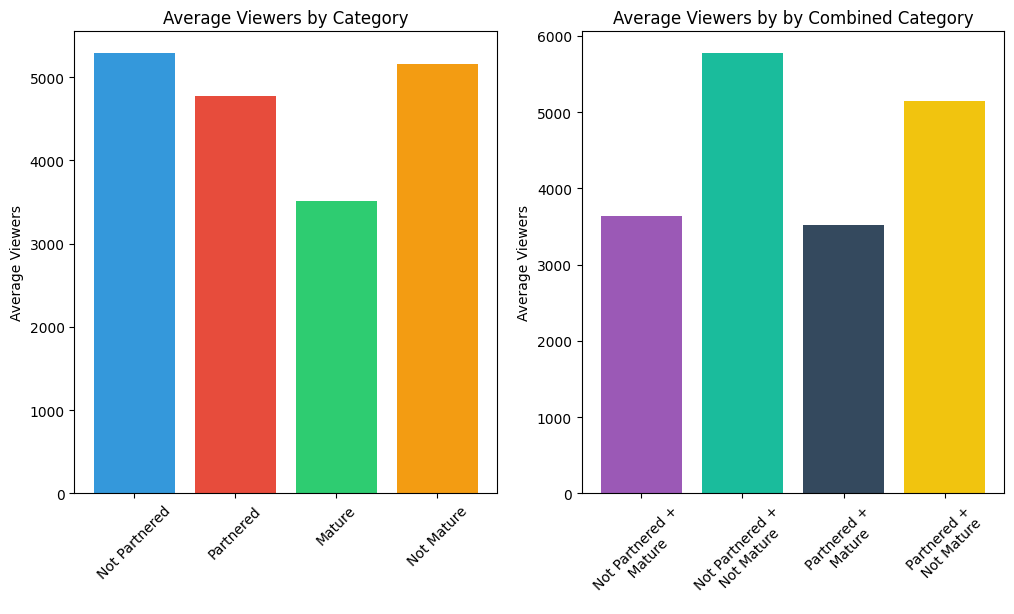

In [23]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
ax1.bar(pm_stats.index, pm_stats['average_viewers'], color=colors)
ax1.set_title('Average Viewers by Category')
ax1.set_ylabel('Average Viewers')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(
    category_stats.index, category_stats['average_viewers'], 
    color=['#9b59b6', '#1abc9c', '#34495e', '#f1c40f']
    )
ax2.set_title('Average Viewers by by Combined Category')
ax2.set_ylabel('Average Viewers')
ax2.tick_params(axis='x', rotation=45)


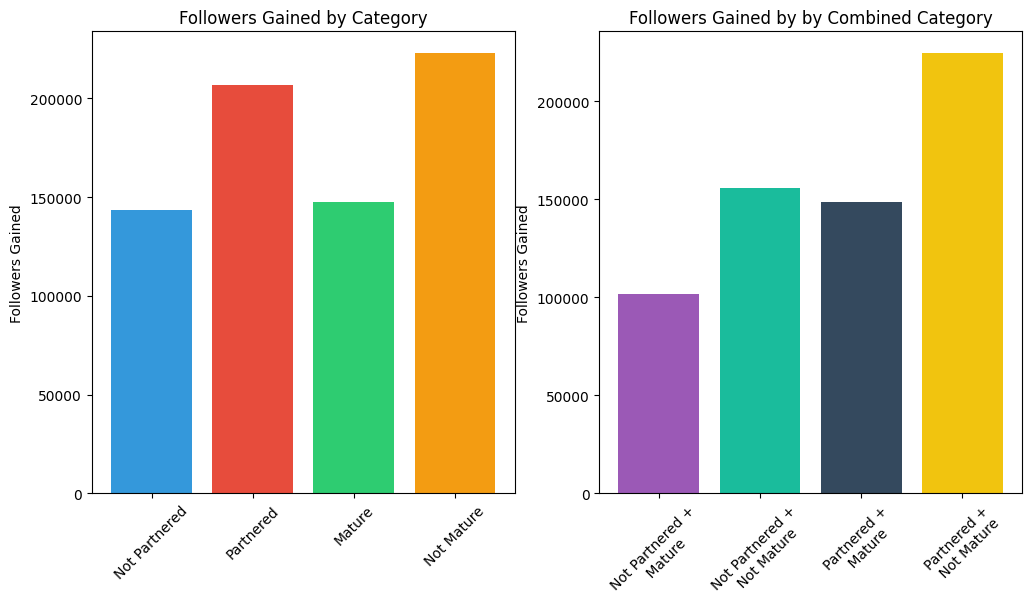

In [24]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
ax1.bar(pm_stats.index, pm_stats['followers_gained'], color=colors)
ax1.set_title('Followers Gained by Category')
ax1.set_ylabel('Followers Gained')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(
    category_stats.index, category_stats['followers_gained'], 
    color=['#9b59b6', '#1abc9c', '#34495e', '#f1c40f']
    )
ax2.set_title('Followers Gained by by Combined Category')
ax2.set_ylabel('Followers Gained')
ax2.tick_params(axis='x', rotation=45)


* Being partnered does not matter much for average followers but is potentially beneficial for growth, i.e., gaining new followers?
* Non Mature content tends to have more average viewers and more followers gained

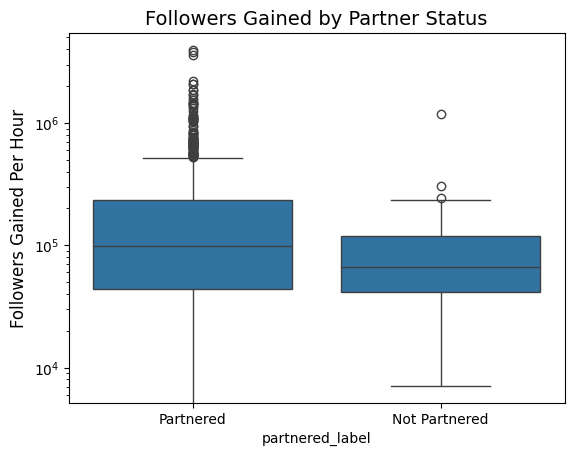

In [31]:
sns.boxplot(x='partnered_label', y='followers_gained', data=data)
plt.title('Followers Gained by Partner Status', fontsize=14)
plt.ylabel('Followers Gained Per Hour', fontsize=12)
plt.yscale('log')